## Import data

In [1]:
df

NameError: name 'df' is not defined

In [378]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [379]:
used_car = pd.read_csv('used_car_indonesia_v2.csv')
used_car.drop(['Unnamed: 0'], axis=1, inplace=True)
used_car.sample(3)

,desc,price,odometer,transmision,location,link
5524,2015 BMW 520i 2.0 Luxury Sedan,Rp 445.000.000,40 - 45K KM,Automatic,DKI Jakarta,https://www.carmudi.co.id/dijual/bmw-520i-luxu...
8207,2018 Toyota Camry 2.5 V Sedan - VERY GREAT CON...,Rp 335.000.000,45 - 50K KM,Automatic,DKI Jakarta,https://www.carmudi.co.id/dijual/toyota-camry-...
9964,2017 Toyota Yaris 1.5 TRD Sportivo Heykers Hat...,Rp 189.999.999,60 - 65K KM,Automatic,Jawa Timur,https://www.carmudi.co.id/dijual/toyota-yaris-...


In [380]:
# used_car[used_car['odometer'].str.find('-')!=-1]['odometer'].unique()

## Clean data: Raw Data to cleaned CSV

### 1. Retrieves information from column: desc

Target: splitting desc column to `year`, `manufacturer`, `model`, and `classification`

#### column: `year`

In [381]:
# Get year information
def get_year(x):
    return int(x[:4])
used_car['year'] = used_car['desc'].apply(lambda x: get_year(x))

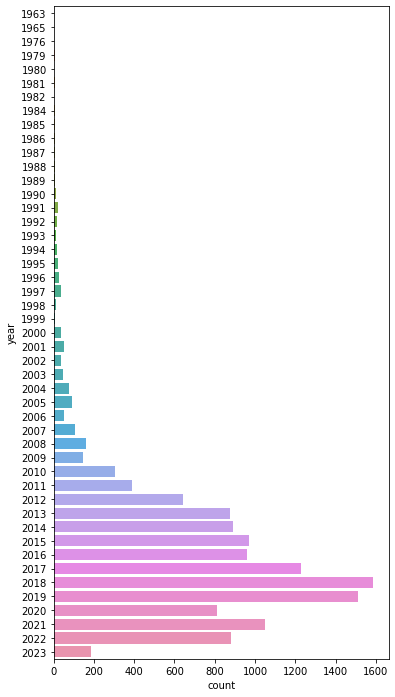

In [382]:
plt.figure(figsize=(6,12))
sns.countplot(data=used_car, y='year')

#### column: `manufacturer`

In [383]:
# get car manufacturer
def get_manufacturer(x):
    return x.split()[1]
used_car['manufacturer'] = used_car['desc'].apply(lambda x: get_manufacturer(x))

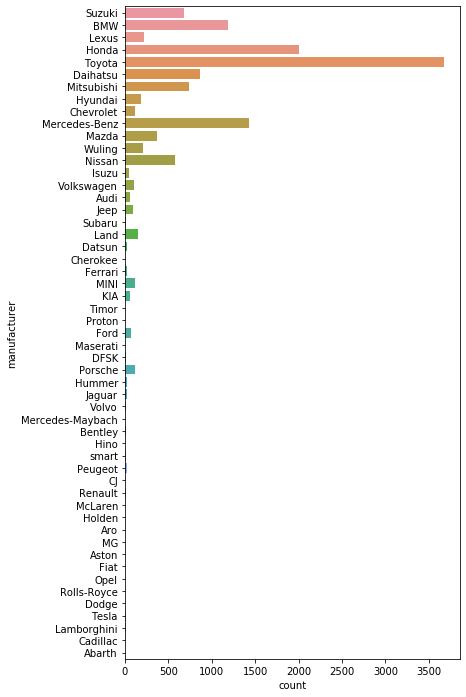

In [384]:
plt.figure(figsize=(6,12))
sns.countplot(data=used_car, y='manufacturer')

Findings:
- 'Land' change to 'Land Rover'
- 'Cherokee' change to 'Jeep'
- 'smart' change to 'Smart Fortwo'
- 'Asaton' change to 'Aston Martin'
- 'Dodge' change to 'Dodge Journey'


- 'Lexus' is a brand from Toyota
- 'Chevrolet', 'Wuling', 'Hummer', 'Cadillac' are brands from Genaral Motor
- 'Datsun' is a brand from Nissan
- 'Jaguar' is a brand from Land Rover

In [385]:
# Correcting manufacturer/ brand name
used_car['manufacturer'].replace('Land','Land Rover', inplace=True)
used_car['manufacturer'].replace('Cherokee','Jeep', inplace=True)
used_car['manufacturer'].replace('smart','Smart Fortwo', inplace=True)
used_car['manufacturer'].replace('Dodge','Dodge Journey', inplace=True)
used_car['manufacturer'].replace('Aston','Aston Martin', inplace=True)

In [386]:
used_car.manufacturer.value_counts()

Toyota              3672
Honda               2004
Mercedes-Benz       1427
BMW                 1188
Daihatsu             869
Mitsubishi           737
Suzuki               684
Nissan               572
Mazda                365
Lexus                224
Wuling               203
Hyundai              189
Land Rover           148
MINI                 120
Chevrolet            119
Porsche              113
Volkswagen           101
Jeep                  92
Ford                  74
Audi                  60
KIA                   54
Isuzu                 51
Jaguar                27
Datsun                25
Ferrari               25
Peugeot               24
Hummer                18
Tesla                 12
Subaru                12
Renault               10
Bentley               10
Smart Fortwo          10
Lamborghini            7
DFSK                   7
Volvo                  7
Rolls-Royce            6
Aston Martin           6
McLaren                5
Maserati               5
Dodge Journey          4


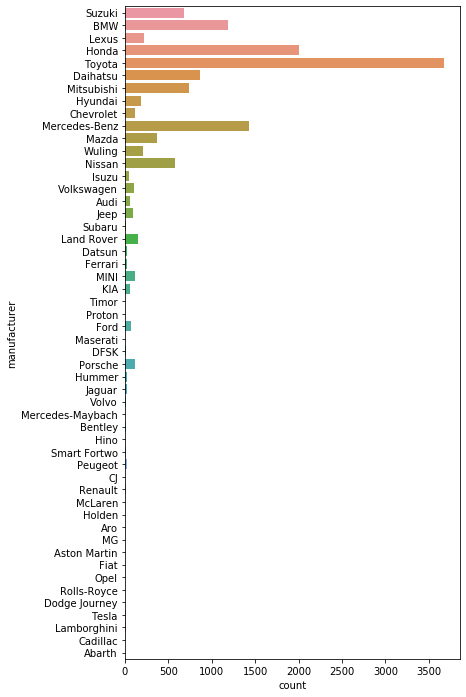

In [387]:
plt.figure(figsize=(6,12))
sns.countplot(data=used_car, y='manufacturer')

#### column: `model`

In [388]:
def get_model(x):
    return x.split()[2]
used_car['model'] = used_car['desc'].apply(lambda x : get_model(x))

In [389]:
# Check suzuki models
used_car[used_car.manufacturer == 'Suzuki']["model"].value_counts()

Ertiga      227
Ignis        83
XL7          81
Baleno       51
SX4          41
Karimun      34
Jimny        31
Carry        29
Swift        28
APV          20
Katana       17
Splash       12
Grand        12
Escudo        7
S-Presso      3
Sidekick      2
Mega          2
Vitara        1
Side          1
Aerio         1
Neo           1
Name: model, dtype: int64

In [390]:
# Correcting the models
used_car['model'].replace('Grand','Grand Vitara', inplace=True)
used_car['model'].replace('Vitara', 'Grand Vitara', inplace=True)
used_car['model'].replace('Side', 'Sidekick', inplace=True)
used_car['model'].replace('Neo', 'Baleno', inplace=True)
used_car['model'].replace('Mega', 'Carry', inplace=True)

In [391]:
# check BMW models
used_car[used_car.manufacturer == 'BMW']["model"].value_counts().index

Index(['320i', 'X1', 'X5', '520i', 'X3', '528i', '530i', '730Li', '330i',
       '520d', '328i', 'X7', 'M4', '218i', '318i', '740Li', '325i', '640i',
       'X4', 'Z4', 'M2', '535i', '840i', 'M3', '320d', '523i', '430i', 'iX',
       '323i', 'M850i', '335i', 'X6', '435i', '750Li', '120i', '116i', '428i',
       'M135i', '730Ld', 'X2', '735IL', 'M5', 'M235i', 'i8', '440i', '550i',
       'i7'],
      dtype='object')

In [392]:
correcting_BMW = [
    [['320i', '330i', '328i', '318i', '325i', '320d', '323i', '335i'], '3 Series'],
    [['520i', '528i', '530i', '520d', '523i','550i', '535i'], '5 Series'],
    [['730Li', '740Li','750Li','730Ld','735IL'], '7 Series'],
    [['218i'], '2 Series'],
    [['640i'], '6 Series'],
    [['840i'], '8 Series'],
    [['430i','435i','428i','440i'], '4 Series'],
    [['120i', '116i'], '1 Series'],
    [['M850i'], 'M8'],
    [['M135i'], 'M1'],
    [['M235i'], 'M2'],
    [['i8', 'i7'], 'iX']
]

# correcting BMW models
for i in range(len(correcting_BMW)):
    used_car['model'].replace(*correcting_BMW[i], inplace=True)

In [393]:
# check lexus models
used_car[used_car.manufacturer == 'Lexus']["model"].value_counts().index

Index(['RX300', 'LX570', 'RX270', 'RX200t', 'LM350', 'NX200t', 'ES300h',
       'NX300', 'RX350', 'UX200', 'LS500', 'LS460L', 'RX350h', 'LX600', 'RC',
       'LS600hL', 'RX450h', 'IS250', 'GS300'],
      dtype='object')

In [394]:
correcting_lexus = [
    [['RX300','RX270', 'RX200t','RX350','RX350h','RX450h'], 'RX'],
    [['LX570','LX600'], 'LX'],
    [['LM350'], 'LM'],
    [['NX200t', 'NX300'], 'NX'],
    [['ES300h'], 'ES'],
    [['UX200'], 'UX'],
    [['LS500', 'LS460L','LS600hL'], 'LS'],
    [['IS250'], 'IS'],
    [['GS300'], 'GS']
]

# correcting lexus models
for i in range(len(correcting_lexus)):
    used_car['model'].replace(*correcting_lexus[i], inplace=True)

In [395]:
# check honda models
used_car[used_car.manufacturer == 'Honda']["model"].value_counts().index

Index(['HR-V', 'Brio', 'CR-V', 'Mobilio', 'Jazz', 'BR-V', 'Civic', 'City',
       'Freed', 'Accord', 'Odyssey', 'CR-Z', 'Stream', 'Elysion', 'S660',
       'WR-V'],
      dtype='object')

In [396]:
# check toyota models
used_car[used_car.manufacturer == 'Toyota']["model"].value_counts().index

Index(['Kijang', 'Avanza', 'Alphard', 'Fortuner', 'Yaris', 'Rush', 'Calya',
       'Agya', 'Vellfire', 'Camry', 'Land', 'Sienta', 'Raize', 'Corolla',
       'Voxy', 'Harrier', 'Innova', 'Vios', 'Veloz', 'Etios', 'Hilux', 'NAV1',
       '86', 'Starlet', 'Limo', 'Crown', 'Hiace', 'Mark', 'Soluna', 'Dyna',
       'C-HR', 'Supra', 'RAV4', 'IST', 'Hardtop', 'FJ', 'iQ', 'Corona',
       'Celica', 'GR86', 'Wish', 'Previa', 'GranAce'],
      dtype='object')

In [397]:
correcting_toyota = [
    [['Land'], 'Land Cruiser'],
    [['FJ'], 'FJ Cruiser']
]

# correcting toyota models
for i in range(len(correcting_toyota)):
    used_car['model'].replace(*correcting_toyota[i], inplace=True)

In [398]:
# check daihatsu models
used_car[used_car.manufacturer == 'Daihatsu']["model"].value_counts().index

Index(['Ayla', 'Xenia', 'Terios', 'Sigra', 'Gran', 'Sirion', 'Rocky', 'Luxio',
       'Taft', 'Taruna', 'Feroza', 'Charade', 'Zebra', 'YRV', 'Espass',
       'Ceria'],
      dtype='object')

In [399]:
# correcting daihatsu models
used_car['model'].replace('Gran', 'Gran Max', inplace=True)

In [400]:
# check mithubishi models
used_car[used_car.manufacturer == 'Mitsubishi']["model"].value_counts().index

Index(['Xpander', 'Pajero', 'Outlander', 'Colt', 'Mirage', 'Eclipse', 'Triton',
       'Lancer', 'Galant', 'Kuda', 'Strada', 'Eterna', 'Fuso', 'Delica',
       'Maven'],
      dtype='object')

In [401]:
# check mithubishi models
used_car[used_car.manufacturer == 'Hyundai']["model"].value_counts().index

Index(['Palisade', 'Creta', 'H-1', 'Santa', 'Stargazer', 'Tucson', 'IONIQ',
       'Avega', 'Staria', 'Atoz', 'Trajet', 'i20', 'Grand Vitara', 'Kona',
       'Getz', 'Sonata'],
      dtype='object')

In [402]:
# correcting hyundai models
mist_list = list(used_car[(used_car.manufacturer=='Hyundai') & (used_car.model == 'Grand Vitara')].index)
for i in mist_list:
    used_car['model'].iloc[i] = 'Grand Avega'
used_car['model'].replace('Santa', 'Santa Fe', inplace=True)

C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [403]:
# check chevrolet models
used_car[used_car.manufacturer == 'Chevrolet']["model"].value_counts().index

Index(['Captiva', 'Trax', 'Spin', 'Trailblazer', 'Orlando', 'Aveo', 'Spark',
       'Colorado', 'Camaro', 'Blazer', 'Estate', 'Optra'],
      dtype='object')

In [404]:
# check mercedes-benz models
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
used_car[used_car.manufacturer == 'Mercedes-Benz']['model'].value_counts().index

Index(['C200', 'E300', 'C250', 'E250', 'CLA200', 'GLA200', 'C300', 'GLC200',
       'S400', 'S450',
       ...
       'CL500', '220E', '230E', 'ML320', 'C320', 'CLS500', 'E53', 'SLC200',
       'SL400', 'SLK300'],
      dtype='object', length=102)

In [405]:
import re
pattern = "^[A-Za-z]+"
p = re.compile(pattern)

merc_list = list(used_car[used_car.manufacturer == 'Mercedes-Benz'].index)
for i in merc_list:
    con = used_car['model'].iloc[i]
    new_model = p.findall(con)
    if len(new_model):
        used_car['model'].iloc[i] = p.findall(con)[0]
    else:
        pass

In [406]:
# check mazda models
used_car[used_car.manufacturer == 'Mazda']['model'].value_counts().index

Index(['CX-5', '2', 'Biante', 'CX-3', 'CX-9', '6', '3', 'CX-7', '8', 'CX-8',
       'RX-8', '5', 'CX-30', 'MX-5', 'E2000', '323'],
      dtype='object')

In [407]:
# check wuling models
used_car[used_car.manufacturer == 'Wuling']['model'].value_counts().index

Index(['Almaz', 'Confero', 'Cortez', 'EV', 'Formo', 'Alvez'], dtype='object')

In [408]:
# correcting wuling models
used_car['model'].replace('EV', 'EV Air', inplace=True)

In [409]:
# check nissan models
used_car[used_car.manufacturer == 'Nissan']['model'].value_counts().index

Index(['Grand Vitara', 'X-Trail', 'Serena', 'March', 'Livina', 'Juke',
       'Elgrand', 'Teana', 'Terra', 'Navara', 'Evalia', 'Terrano', 'Latio',
       'Kicks', 'Leaf', 'Cefiro', '370Z', 'Patrol'],
      dtype='object')

In [410]:
# correcting nissan models
nis_list = list(used_car[(used_car.manufacturer=='Nissan') & (used_car.model == 'Grand Vitara')].index)
for i in nis_list:
    used_car['model'].iloc[i] = 'Grand Livina'

In [411]:
# check isuzu models
used_car[used_car.manufacturer == 'Isuzu']['model'].value_counts().index

Index(['Panther', 'Elf', 'Pickup', 'MU-X', 'Traga', 'D-Max', 'Giga', 'Trooper',
       'MU-7'],
      dtype='object')

In [412]:
# check volkswager models
used_car[used_car.manufacturer == 'Volkswagen']['model'].value_counts().index

Index(['Tiguan', 'Scirocco', 'Golf', 'Polo', 'Caravelle', 'Touareg', 'Touran',
       'New'],
      dtype='object')

In [413]:
# correcting volkswagen models
used_car['model'].replace('New', 'New Beetle', inplace=True)

In [414]:
# check audi models
used_car[used_car.manufacturer == 'Audi']['model'].value_counts().index

Index(['A4', 'Q3', 'A6', 'Q7', 'A5', 'RS5', 'Q5', 'A8', 'A3', 'TT', 'R8'], dtype='object')

In [415]:
# check jeep models
used_car[used_car.manufacturer == 'Jeep']['model'].value_counts().index

Index(['Wrangler', '4.0', 'Cherokee', 'Compass', 'Patriot', 'Grand Vitara',
       'Gladiator'],
      dtype='object')

In [416]:
# correcting jeep models
# 4.0, Grand Vitara to Cherokee
used_car['model'].replace('4.0', 'Cherokee', inplace=True)
jeep_list = list(used_car[(used_car.manufacturer=='Jeep') & (used_car.model == 'Grand Vitara')].index)
for i in jeep_list:
    used_car['model'].iloc[i] = 'Cherokee'

In [417]:
# check subaru models
used_car[used_car.manufacturer == 'Subaru']['model'].value_counts().index

Index(['WRX', 'XV', 'Impreza', 'Legacy', 'BRZ', 'Forester', 'Outback'], dtype='object')

In [418]:
# check land rover models
used_car[used_car.manufacturer == 'Land Rover']['model'].value_counts().index

Index(['Rover'], dtype='object')

In [419]:
# correcting hyundai models
land_list = list(used_car[(used_car.manufacturer=='Land Rover') & (used_car.model == 'Rover')].index)
for i in land_list:
    used_car['model'].iloc[i] = used_car['desc'].iloc[i].split()[3]
used_car['model'].replace('Range', 'Range Rover', inplace=True)

In [420]:
# check land rover models
used_car[used_car.manufacturer == 'Land Rover']['model'].value_counts().index

Index(['Range Rover', 'Defender', 'Discovery'], dtype='object')

In [421]:
# check Datsun models
used_car[used_car.manufacturer == 'Datsun']['model'].value_counts().index

Index(['GO+', 'Cross', 'GO'], dtype='object')

In [422]:
# check ferrari models
used_car[used_car.manufacturer == 'Ferrari']['model'].value_counts().index

Index(['California', '458', 'F430', '488', 'Roma', 'F12berlinetta', 'FF'], dtype='object')

In [423]:
# correcting ferrari models
# F12berlinetta to F12
used_car['model'].replace('F12berlinetta', 'F12', inplace=True)

In [424]:
# check mini models
used_car[used_car.manufacturer == 'MINI']['model'].value_counts().index

Index(['Cooper', 'Countryman', 'Cabrio', 'Clubman', 'Paceman', '1.6',
       'Morris'],
      dtype='object')

In [425]:
# correcting mini models
# 1.6 to John Cooper
used_car['model'].replace('1.6', 'John Cooper', inplace=True)

In [426]:
# check KIA models
used_car[used_car.manufacturer == 'KIA']['model'].value_counts().index

Index(['Picanto', 'Rio', 'Sportage', 'Sorento', 'Grand Vitara', 'Sonet',
       'Seltos', 'Visto', 'Pride', 'Carens', 'Carnival', 'EV6', 'Pregio'],
      dtype='object')

In [427]:
# correcting KIA models
kia_list = list(used_car[(used_car.manufacturer=='KIA') & (used_car.model == 'Grand Vitara')].index)
for i in kia_list:
    kia_model = used_car['desc'].iloc[i].split()[2:4]
    used_car['model'].iloc[i] = ' '.join(kia_model)

In [428]:
# check timor models
used_car[used_car.manufacturer == 'Timor']['model'].value_counts().index

Index(['S-515'], dtype='object')

In [429]:
# check proton models
used_car[used_car.manufacturer == 'Proton']['model'].value_counts().index

Index(['Exora'], dtype='object')

In [430]:
# check ford models
used_car[used_car.manufacturer == 'Ford']['model'].value_counts().index

Index(['Fiesta', 'Mustang', 'EcoSport', 'Escape', 'Everest', 'Ranger',
       'Focus'],
      dtype='object')

In [431]:
# check maserati models
used_car[used_car.manufacturer == 'Maserati']['model'].value_counts().index

Index(['Ghibli', 'GranTurismo', 'Levante', 'Quattroporte'], dtype='object')

In [432]:
# check DFSK models
used_car[used_car.manufacturer == 'DFSK']['model'].value_counts().index

Index(['Glory', 'Super'], dtype='object')

In [433]:
# correcting DFSK models
used_car['model'].replace('Super', 'Super Cab', inplace=True)

In [434]:
# check porsche models
used_car[used_car.manufacturer == 'Porsche']['model'].value_counts().index

Index(['Cayman', 'Macan', '911', 'Cayenne', 'Panamera', '718', 'Boxster',
       'Taycan'],
      dtype='object')

In [435]:
# check hummmer models
used_car[used_car.manufacturer == 'Hummer']['model'].value_counts().index

Index(['H3', 'H2'], dtype='object')

In [436]:
# check jaguar models
used_car[used_car.manufacturer == 'Jaguar']['model'].value_counts().index

Index(['XF', 'XJ', 'X-Type', 'XE', 'F-Type', 'XJ8', 'F-Pace', 'XJ6', 'S-Type'], dtype='object')

In [437]:
# correcting jaguar models
used_car['model'].replace(['XF', 'XJ', 'XE', 'XJ8', 'XJ6'], 'X-Type', inplace=True)

In [438]:
# check volvo models
used_car[used_car.manufacturer == 'Volvo']['model'].value_counts().index

Index(['S60', 'S40', 'S90', 'XC90', 'S80'], dtype='object')

In [439]:
# correcting volvo models
used_car['model'].replace(['S60', 'S40', 'S90', 'S80'], 'S', inplace=True)
used_car['model'].replace('XC90', 'XC', inplace=True)

In [440]:
# check mercedes-maybach models
used_car[used_car.manufacturer == 'Mercedes-Maybach']['model'].value_counts()

S650    1
Name: model, dtype: int64

In [441]:
# joining mercedes brands
used_car['manufacturer'].replace(['Mercedes-Maybach', 'Mercedes-Benz'], 'Mercedes', inplace=True)

In [442]:
# check bentley models
used_car[used_car.manufacturer == 'Bentley']['model'].value_counts().index

Index(['Continental', 'Bentayga'], dtype='object')

In [443]:
# correcting bentley models
used_car['model'].replace('Continental', 'Continental GT', inplace=True)

In [444]:
# check hino models
used_car[used_car.manufacturer == 'Hino']['model'].value_counts().index

Index(['Dutro'], dtype='object')

In [445]:
# check smart fortwo models
used_car[used_car.manufacturer == 'Smart Fortwo']['model'].value_counts().index

Index(['fortwo', 'Smart'], dtype='object')

In [446]:
# correcting smart fortwo models
used_car['model'].replace('fortwo', '1.0', inplace=True)
used_car['model'].replace('Smart', 'Mhd', inplace=True)

In [447]:
# check pugeot models
used_car[used_car.manufacturer == 'Peugeot']['model'].value_counts().index

Index(['3008', '5008', '406', '307', 'RCZ', '206', '408', '405', '807', '207'], dtype='object')

In [448]:
# check renault models
used_car[used_car.manufacturer == 'Renault']['model'].value_counts().index

Index(['Triber', 'Koleos', 'Kwid'], dtype='object')

In [449]:
# check tesla models
used_car[used_car.manufacturer == 'Tesla']['model'].value_counts().index

Index(['Model'], dtype='object')

In [450]:
# correcting tesla model
tesla_list = list(used_car[(used_car.manufacturer=='Tesla') & (used_car.model == 'Model')].index)
for i in tesla_list:
    tesla_model = used_car['desc'].iloc[i].split()[2:4]
    used_car['model'].iloc[i] = ' '.join(tesla_model)

In [641]:
# drop car manufacturer which less than 10 car's data available.
poor_data_cars = list(used_car.manufacturer.value_counts()[used_car.manufacturer.value_counts()<10].index)
used_car2 = used_car[used_car.manufacturer.isin(poor_data_cars) == False].copy()

In [642]:
used_car2.reset_index(drop=True, inplace=True)

#### column : classification

In [643]:
car_classifications = [
    "Sedan",
    "SUV",
    "Truck",
    "Trucks",
    "Coupe",
    "Hatchback",
    "Wagon",
    "Convertible",
    "Minivan",
    "MPV",
    "Van",
    "Crossover",
    "Pick-up",
    "Fastback",
    "Minibus",
    "Pick",
    "Cabriolet",
    "Sportback"
]

In [644]:
used_car2['classification'] = 'Unknown'
for i in range(len(used_car2)):
    for item in used_car2.desc[i].split():
        if item in car_classifications:
            used_car2['classification'].iloc[i] = item

C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [645]:
used_car2.classification.value_counts()

SUV            3700
MPV            2694
Hatchback      2088
Sedan          1955
Wagon          1839
Coupe           438
Unknown         129
Pick-up         128
Convertible     103
Van              91
Trucks           21
Fastback         17
Cabriolet        17
Sportback         6
Pick              5
Minibus           5
Truck             4
Name: classification, dtype: int64

In [646]:
# correcting yaris classification
yaris_list = list(used_car2[used_car2.model == 'Yaris'].index)
for i in yaris_list:
    used_car2['classification'].iloc[i] = 'Hatchback'

In [647]:
# correcting jazz classification
jazz_list = list(used_car2[used_car2.model == 'Jazz'].index)
for i in jazz_list:
    used_car2['classification'].iloc[i] = 'Hatchback'

In [648]:
# correcting cherokee classification
cherokee_list = list(used_car2[used_car2.model == 'Cherokee'].index)
for i in cherokee_list:
    used_car2['classification'].iloc[i] = 'SUV'

In [649]:
# correcting taft classification
taft_list = list(used_car2[used_car2.model == 'Taft'].index)
for i in taft_list:
    used_car2['classification'].iloc[i] = 'Jeep'

In [650]:
# correcting jimny classification
jimny_list = list(used_car2[(used_car2.model == 'Jimny') & (used_car2.classification == 'Unknown')].index)
for i in jimny_list:
    used_car2['classification'].iloc[i] = 'Jeep'

In [651]:
# correcting range rover classification
range_r_list = list(used_car2[used_car2.model == 'Range Rover'].index)
for i in range_r_list:
    used_car2['classification'].iloc[i] = 'SUV'

In [652]:
# correcting kijang model
kijang_list = list(used_car2[(used_car2.manufacturer=='Toyota') & (used_car2.model == 'Kijang')].index)
for i in kijang_list:
    kijang_model = used_car2['desc'].iloc[i].split()[2:4]
    used_car2['model'].iloc[i] = ' '.join(kijang_model)

In [653]:
jeep_list = list(used_car2[(used_car2.manufacturer!='Jeep') & (used_car2.classification == 'Unknown')].index)

for i in jeep_list:
    for item in used_car2.desc[i].split():
        if item in ['Jeep']:
            used_car2['classification'].iloc[i] = 'Jeep'

In [654]:
colt_list = list(used_car2[(used_car2.model =='Colt') & (used_car2.classification == 'Unknown')].index)
for i in colt_list:
    used_car2['classification'].iloc[i] = 'Pick-up'

In [655]:
pajero_list = list(used_car2[(used_car2.model =='Pajero') & (used_car2.classification == 'Unknown')].index)
for i in pajero_list:
    used_car2['classification'].iloc[i] = 'SUV'

In [656]:
kijang_list = list(used_car2[(used_car2.model =='Kijang Innova') & (used_car2.classification == 'Unknown')].index)
for i in kijang_list:
    used_car2['classification'].iloc[i] = 'MPV'

In [657]:
xpander_list = list(used_car2[(used_car2.model =='Xpander') & (used_car2.classification == 'Unknown')].index)
for i in xpander_list:
    used_car2['classification'].iloc[i] = 'MPV'

In [658]:
cruiser_list = list(used_car2[(used_car2.model =='Land Cruiser') & (used_car2.classification == 'Unknown')].index)
for i in cruiser_list:
    used_car2['classification'].iloc[i] = 'SUV'

In [659]:
mini_list = list(used_car2[(used_car2.model =='Morris') & (used_car2.classification == 'Unknown')].index)
for i in mini_list:
    used_car2['classification'].iloc[i] = 'Hatchback'

In [660]:
smart_list = list(used_car2[(used_car2.manufacturer =='Smart Fortwo')].index)
for i in smart_list:
    used_car2['classification'].iloc[i] = 'Coupe'

In [661]:
clk_list = list(used_car2[(used_car2.model =='CLK') & (used_car2.classification == 'Unknown')].index)
for i in clk_list:
    used_car2['classification'].iloc[i] = 'Coupe'

In [662]:
clk_list = list(used_car2[(used_car2.model =='Defender') & (used_car2.classification == 'Unknown')].index)
for i in clk_list:
    used_car2['classification'].iloc[i] = 'SUV'

In [663]:
clk_list = list(used_car2[(used_car2.model =='Unimog') & (used_car2.classification == 'Unknown')].index)
for i in clk_list:
    used_car2['classification'].iloc[i] = 'Truck'

In [664]:
clk_list = list(used_car2[(used_car2.model =='300CE') & (used_car2.classification == 'Unknown')].index)
for i in clk_list:
    used_car2['classification'].iloc[i] = 'Coupe'

In [665]:
clk_list = list(used_car2[(used_car2.model =='Odyssey') & (used_car2.classification == 'Unknown')].index)
for i in clk_list:
    used_car2['classification'].iloc[i] = 'MPV'

In [666]:
used_car2['classification'].value_counts()

SUV            3765
MPV            2711
Hatchback      2097
Sedan          1955
Wagon          1838
Coupe           440
Pick-up         130
Convertible     103
Van              91
Jeep             35
Trucks           21
Fastback         17
Cabriolet        16
Sportback         6
Pick              5
Minibus           5
Truck             5
Name: classification, dtype: int64

In [667]:
# pick = pick-up
# trucks = truck
# Sportback = Hatchback

clk_list = list(used_car2[(used_car2.classification =='Pick')].index)
for i in clk_list:
    used_car2['classification'].iloc[i] = 'Pick-up'

clk_list = list(used_car2[(used_car2.classification =='Trucks')].index)
for i in clk_list:
    used_car2['classification'].iloc[i] = 'Truck'
    
    clk_list = list(used_car2[(used_car2.classification =='Sportback')].index)
for i in clk_list:
    used_car2['classification'].iloc[i] = 'Hatchback'

In [668]:
used_car2['classification'].value_counts()

SUV            3765
MPV            2711
Hatchback      2103
Sedan          1955
Wagon          1838
Coupe           440
Pick-up         135
Convertible     103
Van              91
Jeep             35
Truck            26
Fastback         17
Cabriolet        16
Minibus           5
Name: classification, dtype: int64

### 2. Cleaning column: price

In [688]:
pattern = "[0-9]+"
p = re.compile(pattern)

used_car2['car_price'] = int(0)
for i in range(len(used_car2)):
    draft_price = used_car2.price[i][3:].replace('.','')
    used_car2['car_price'][i]= int(p.findall(draft_price)[0])

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array

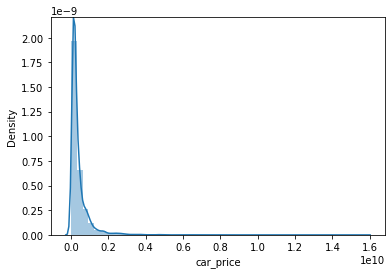

In [690]:
sns.distplot(used_car2.car_price)

### 3. Cleaning column: odometer to mileage

In [697]:
used_car2['odometer'].value_counts()[:30]

20 - 25K KM      688
30 - 35K KM      645
15 - 20K KM      621
25 - 30K KM      618
10 - 15K KM      603
40 - 45K KM      587
5 - 10K KM       550
50 - 55K KM      549
35 - 40K KM      531
45 - 50K KM      481
0 - 5K KM        456
60 - 65K KM      419
70 - 75K KM      394
55 - 60K KM      388
65 - 70K KM      385
75 - 80K KM      383
80 - 85K KM      331
85 - 90K KM      318
90 - 95K KM      302
95 - 100K KM     273
100 - 105K KM    240
120 - 125K KM    189
110 - 115K KM    159
105 - 110K KM    156
115 - 120K KM    134
140 - 145K KM    117
130 - 135K KM    113
125 - 130K KM     98
160 - 165K KM     78
135 - 140K KM     75
Name: odometer, dtype: int64

In [713]:
pattern = "[0-9]+"
p = re.compile(pattern)

pattern = "K"
r = re.compile(pattern)

used_car2['mileage'] = int(0)

for i in range(len(used_car2)):   
    try:
        draft_mileage = used_car2.odometer[i][:-2]

        # find K multiplication
        kilo = 1
        if r.findall(draft_mileage):
            kilo = 1000

        # get the mileage
        draft_mileage = p.findall(draft_mileage)
        if len(draft_mileage) == 2:
            used_car2['mileage'][i] = (int(draft_mileage[0])+int(draft_mileage[1]))*kilo/2
        elif len(draft_mileage) == 1:
            used_car2['mileage'][i] = int(draft_mileage[0])*kilo
    except:
        pass

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array

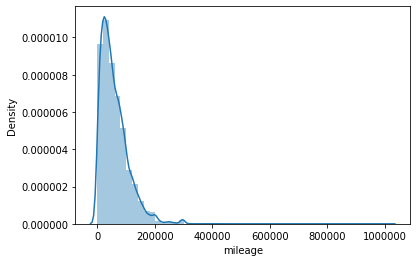

In [716]:
sns.distplot(used_car2.mileage)

### 4. Fix dataframe

In [717]:
used_car2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   desc            13240 non-null  object
 1   price           13240 non-null  object
 2   odometer        13240 non-null  object
 3   transmision     13240 non-null  object
 4   location        13240 non-null  object
 5   link            13240 non-null  object
 6   year            13240 non-null  int64 
 7   manufacturer    13240 non-null  object
 8   model           13240 non-null  object
 9   classification  13240 non-null  object
 10  car_price       13240 non-null  int64 
 11  mileage         13240 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.2+ MB


In [718]:
# drop unused column
cols = ['desc', 'price', 'odometer']
used_car_fix = used_car2.drop(cols, axis=1).copy()

In [728]:
# save to csv
used_car_fix.to_csv("used_car_indonesia_20231217.csv", index=False)